This dataset was created by the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland. It claims to be the most comprehensive unclassified database on terrorist attacks in the world.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import matplotlib
matplotlib.rcParams['xtick.major.size'] = 0
matplotlib.rcParams['ytick.major.size'] = 0


df = pd.read_csv('../input/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory = False)
# The column listing number of perpetrators has many attacks listed as -99.0, and some as -9.0.
# I can't find any discription of the meaning of these values, so I'll replace them with nan to make analysis possible.
nperps = df['nperps'].replace(-99.0, np.nan).replace(-9.0, np.nan)
df['nperps'] = nperps

print('A little section of the dataset:')
display(df.head())

print('Total number of attacks documented:', df.shape[0])

A little section of the dataset:


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Total number of attacks documented: 181691


In [ ]:
year_count = df.groupby('iyear')['eventid'].count()

plt.subplots(figsize = (16, 10))
plt.bar(year_count.index, year_count.values, color = 'black')
plt.title('Number of Attacks Over Time', fontsize = 20, y = 1.02)
plt.show()

The huge spike in recent years is obvious and disturbing. Also very intriguing is the constant decline since 2014.

There is no data for 1993 because it was lost before everything was digitized, according to the FAQ on the provider's site.

In [ ]:
print('Worst year:', year_count.idxmax())
print('Number of incidents in that year:', year_count.max())

print('\nNumber of incidents in 2017 (most recent year in the data):', year_count[2017])

In [ ]:
# defining a new colormap, so matplotlib doesn't re-use colors
n = len(df['region_txt'].unique())
color = plt.cm.rainbow(np.linspace(0,1,n))
c = zip(range(n), color)
colors = [color for color in c]
count = 0

fig, ax = plt.subplots(figsize = (26, 15))
for region in df['region_txt'].unique():
    subset = df[df['region_txt'] == region]
    year_count = subset.groupby('iyear')['eventid'].count()
    
    sns.lineplot(year_count.index, year_count.values, label = region, color = colors[count][1], linewidth = 5)
    if year_count.values[-1] > 110:
        plt.text(year_count.index[-1] + 0.5, year_count.values[-1], s = region, color = 'white', fontsize = 16, fontweight = 'bold')
    count += 1

plt.title('Number of Attacks by Region over Time', fontsize = 30, y = 1.03, color = 'white', fontweight = 'bold')
ax.set_facecolor('black')
fig.set_facecolor('black')
plt.yticks(fontsize = 16, color = 'white', fontweight = 'bold')
plt.xticks(fontsize = 16, color = 'white', fontweight = 'bold')
plt.legend(loc = 'best', prop={'size': 20});

Evidently the modern surge in attacks is primarily driven by incidents in the Middle East & North Africa, South Asia, Sub-Saharan Africa, and Southeast Asia.

Australasia & Oceania, Central Asia, and East Asia are all barely visible, because they've seen such a small number of attacks relative to the other regions for the entire period.

Central America and South America experienced many attacks in the '80s and '90s, and comparatively few since then. South America still has somewhat high levels though, with more attacks in the latest year than Eastern Europe or North America.

North America is sporadically visible, with its levels generally quite low. There has been some increase in the number of attacks there in recent years, approaching the levels of earlier peaks. 

Eastern Europe, has also had fairly low levels generally, but saw a huge spike in the 2010s. Western Europe had very high relative numbers of attack in the '70s (when most other regions had almost none), and a fairly large number of attacks in the '80s and '90s, with a decline in the 2000s. It is trending upwards in recent years as well, although it's still below its average pre-2000s levels (which was ~463 per year, albeit with fairly large variance; the calculation is in the hidden code cell below this one, if you would like to check it).

Let's graph a few of the regions individually, so their trends are less obscured.

In [ ]:
subset = df[df['region_txt'] == 'Western Europe']
subset = subset[subset['iyear'] < 2000]
year_count = subset.groupby('iyear')['eventid'].count()
print('Mean number of attacks per year in Western Europe before 2000: {:,.2f}'.format(year_count.mean()))

In [ ]:
region_list = ['North America', 'Western Europe', 'Eastern Europe', 'East Asia', 'Sub-Saharan Africa', 'Southeast Asia']

fig, axes = plt.subplots(3, 2, figsize = (18, 12))
plt.suptitle('Number of Attacks Over Time in a Subset of Regions', fontsize = 22)

subset = df[df['region_txt'] == 'North America']
year_count = subset.groupby('iyear')['eventid'].count()
axes[0, 0].plot(year_count, color = 'black')
axes[0, 0].set_title('North America', fontsize = 16, y = 1.02)

subset = df[df['region_txt'] == 'South America']
year_count = subset.groupby('iyear')['eventid'].count()
axes[0, 1].plot(year_count, color = 'black')
axes[0, 1].set_title('South America', fontsize = 16, y = 1.02)

subset = df[df['region_txt'] == 'Western Europe']
year_count = subset.groupby('iyear')['eventid'].count()
axes[1, 0].plot(year_count, color = 'black')
axes[1, 0].set_title('Western Europe', fontsize = 16, y = 1.02)

subset = df[df['region_txt'] == 'Eastern Europe']
year_count = subset.groupby('iyear')['eventid'].count()
axes[1, 1].plot(year_count, color = 'black')
axes[1, 1].set_title('Eastern Europe', fontsize = 16, y = 1.02)

subset = df[df['region_txt'] == 'Southeast Asia']
year_count = subset.groupby('iyear')['eventid'].count()
axes[2, 0].plot(year_count, color = 'black')
axes[2, 0].set_title('Southeast Asia', fontsize = 16, y = 1.02)

subset = df[df['region_txt'] == 'East Asia']
year_count = subset.groupby('iyear')['eventid'].count()
axes[2, 1].plot(year_count, color = 'black')
axes[2, 1].set_title('East Asia', fontsize = 16, y = 1.02)

plt.show()

It's interesting that Eastern Europe experienced essentially no attacks before the late '80s. I guess they started as the Soviet Union was collapsing.

In [ ]:
region_count = df.groupby('region_txt')['eventid'].count().sort_values(ascending = False)

plt.subplots(figsize = (20, 12))
sns.barplot(x = region_count.index, y = region_count.values, palette = 'viridis')
plt.xticks(rotation = 80, fontsize = 15)
plt.xlabel('')
sns.despine(left = True)
plt.title('Number of Attacks by Region, since 1970', fontsize = 22, y = 1.02);

# it would be nice to normalize these values by population size

Sub-Saharan Africa -- with its current high number of attacks -- is just catching up to South America and Western Europe, which have relatively low levels now, but experienced many attacks in the past.

I'll graph the total number of attacks in every country, to help understand the relative distribution.

In [ ]:
print('Number of countries in the dataset:', len(df.country_txt.unique()))

country_count = df.groupby('country_txt')['eventid'].count().sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (20, 12))
sns.barplot(country_count.index, country_count.values, palette = 'inferno', alpha = 0.9)
plt.title('Number of Attacks by Country, since 1970', fontsize = 26, y = 0.94)
plt.xticks(rotation = 90)
ax.set_xticks([])
ax.margins(x = 0.005)
plt.xlabel('')
fig.set_facecolor('snow')
ax.set_facecolor('snow')
sns.despine(left = True);

In [ ]:
# there are 205 countries, so we want the 102nd one in our ordered list

country_count = df.groupby('country_txt')['eventid'].count().sort_values(ascending = False)
median = country_count[102]
name = country_count[country_count == 66].index[0]

print('The median country is {}, with {} attacks'.format(name, median))

In [ ]:
country_count = df.groupby('country_txt')['eventid'].count().sort_values(ascending = False)
print('Least attacked countries:\n', country_count.tail(12))

No country in the dataset has avoided attack entirely (or it wouldn't be in the dataset), but several have been attacked only once, including the Falkland Islands, Vatican City, and North Korea (see the hidden code cell above for the full list).

I can't put readable country names on the graph above, so let's also plot number of attacks in some of the worst affected countries.

In [ ]:
country_count = df.groupby('country_txt')['eventid'].count().sort_values(ascending = False)
fig, ax = plt.subplots(figsize = (12, 20))
plt.barh(country_count[:50].index, country_count[:50].values, color = 'black')
plt.title('Number of Attacks In Top 50 Countries, since 1970', fontsize = 22, y = 1.02)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 14)
ax.tick_params(axis = 'x', length = 5, width = 2)
plt.show()

print('{:,.1f}% of all attacks took place in Iraq'.format((country_count[0] / country_count.sum()) * 100))
print('{:,.1f}% of all attacks took place in Pakistan'.format((country_count[1] / country_count.sum()) * 100))
print('{:,.1f}% of all attacks took place in Afghanistan'.format((country_count[2] / country_count.sum()) * 100))
print('{:,.1f}% of all attacks took place in India\n'.format((country_count[3] / country_count.sum()) * 100))

combined_percent = ((country_count[0] + country_count[1] + country_count[2] + country_count[3]) / country_count.sum()) * 100
print('Together, they account for {:,.1f}% of the attacks'.format(combined_percent))

In [ ]:
city_count = df.groupby('city')['eventid'].count().sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (12, 20))
plt.barh(city_count[1:21].index, city_count[1:21].values, color = 'black')
plt.xticks(fontsize = 16)
ax.tick_params(axis = 'x', length = 5, width = 2)
plt.title('Number of Attacks in Top 20 Cities, since 1970', fontsize = 22, y = 1.02)
ax.margins(x = 0.02);

In [ ]:
country_count = df.groupby('country_txt')['eventid'].count().sort_values(ascending = False)

data = dict(type = 'choropleth', 
            locations = country_count.index,
            locationmode = 'country names',
            z = country_count.values, 
            text = country_count.index)
layout = dict(title = 'Number of Attacks Since 1970', 
              height = 1200,
              geo = dict(showframe = False, 
                         projection = {'type': 'mercator'}))

fig = go.Figure(data = [data], layout=layout)
iplot(fig)

# Numbers Killed and Wounded

In [ ]:
print('Total number killed: {}'.format(int(df['nkill'].sum())))
print('Total number wounded: {}\n'.format(int(df['nwound'].sum())))
print('Mean number killed per attack: {:,.2f}'.format(df['nkill'].mean()))
print('Standard deviation in number killed per attack: {:,.2f}\n'.format(df['nkill'].std()))
print('Mean number wounded per attack: {:,.2f}'.format(df['nwound'].mean()))
print('Standard deviation in number wounded per attack: {:,.2f}'.format(df['nwound'].std()))

In [ ]:
killed = df.groupby('nkill').count()['eventid']
greater_than_20 = killed[21:]
killed = killed[:20]
int_index = [int(num) for num in killed.index]
killed = killed.reindex(int_index)
killed = killed.append(pd.Series(greater_than_20.sum(), index = ['>20']))

plt.subplots(figsize = (16, 10))
sns.barplot(killed.index, killed.values, color = 'black', alpha = 0.9)
plt.xlabel('Number Killed', fontsize = 14)
plt.ylabel('Number of Attacks', fontsize = 14)
plt.title('Number of Attacks By Number Killed', fontsize = 26, y = 1.02)
sns.despine(left = True)
plt.show()

none_killed = df[df['nkill'] == 0]
print('Number of attacks in which no one was killed:', len(none_killed))
print('Percent of all incidents: {:,.1f}%\n'.format((len(none_killed) / len(df['nkill']) * 100)))

one_killed = df[df['nkill'] == 1]
print('Number of attacks in which one person was killed:', len(one_killed))
print('Percent of all incidents: {:,.1f}%'.format((len(one_killed) / len(df['nkill']) * 100)))

over_20_killed = df[df['nkill'] > 20]
print()
print('Number of attacks in which more than 20 people were killed:', len(over_20_killed))
print('Percent of total incidents: {:,.1f}%'.format((len(over_20_killed)/len(df['nkill'])) * 100))

over_100_killed = df[df['nkill'] > 100]
print()
print('Number of attacks in which more than 100 people were killed:', len(over_100_killed))
print('Percent of total incidents: {:,.1f}%'.format(len(over_100_killed)/len(df['nkill']) * 100))

over_1000_killed = df[df['nkill'] > 1000]
print()
print('There were 4 attacks in which more than 1000 people were killed')
print('Their records are displayed below:')
display(over_1000_killed)

Two of the four most deadly incidents were the World Trade Center attacks. 

One of the others was an episode in the Rwandan genocide called the Musha Church Massacre. Thousands of Tutsis sought refuge in this church in Rwanda's capital, Kigali; a Hutu paramilitary group launched an attack on the church using guns, grenades, and machettes, and more than a thousand people were killed. A judgment and sentence related to the case from the International Criminal Tribunal for Rwanda is linked below:

http://unictr.irmct.org/sites/unictr.org/files/case-documents/ictr-00-60/trial-judgements/en/060413.pdf

Finally, the attack in the dataset which individually killed the most people was the Camp Speicher massacre in Iraq. In 2014, ISIL attacked this airfield and academy, killing more than 1500 unarmed Iraqi Airforce cadets in mass shooting executions. ISIL posted videos and photographs of the massacre on their website. A news article about the attack is linked below:

https://www.independent.co.uk/news/world/middle-east/camp-speicher-massacre-isis-islamic-state-tikrit-air-academy-iraq-a8040576.html

<br/>
On a positive rather than horrific note, it's striking how many attacks resulted in no deaths.

There is substantial regional variation in the average number killed per attack. Let's see a graph.

In [ ]:
relative_deadliness = df.groupby(by = 'region_txt').mean()['nkill'].sort_values(ascending = False)

plt.subplots(figsize = (12, 8))
sns.barplot(relative_deadliness.index, relative_deadliness.values, palette = 'viridis')
plt.xticks(rotation = 70)
plt.xlabel('')
sns.despine(left = True)
plt.title('Average Number Killed Per Attack By Region', fontsize = 18, y = 1.02);

The extremely high average in Sub-Saharan Africa is disturbing. I wonder how consistent that is over time. Let's see a time series.

In [ ]:
# defining a new colormap, so matplotlib doesn't re-use colors
n = len(df['region_txt'].unique())
color = plt.cm.gist_ncar(np.linspace(0,1,n))
c = zip(range(n), color)
colors = [color for color in c]
count = 0

fig, ax = plt.subplots(figsize = (18, 12))
for region in df['region_txt'].unique():
    region_data = df[df['region_txt'] == region].groupby('iyear').mean()['nkill']
    
    plt.plot(region_data.index, region_data.values, label = region, color = colors[count][1], linewidth = 3)
    count += 1
    
plt.legend()
plt.title('Average Number Killed per Attack', fontsize = 22, y = 1.02)
ax.set_facecolor('black')
sns.despine(left = True);

It looks like Sub-Saharan Africa has had the deadliest average attacks most years since 1990. It was of course outstripped by North America in 2001, because of the 9/11 attacks. 

It was also outstripped by Eastern Europe in 2004, primarily on the basis of one attack, it seems. Records for the worst Eastern European attacks from that year are displayed below. The exceptionally bad attack which is dragging up the average is a hostage taking incident in Russia called the Beslan school siege, which resulted in the deaths of 344 victims. It was perpetrated by Chechen rebels in the North Caucasus. Many of the people killed were children, and it precipitated large-scale counterterrorism reforms in Russia. A short article about it from the Encyclopedia Britannica is linked below:

https://www.britannica.com/event/Beslan-school-attack

In [ ]:
ee = df[df['region_txt'] == 'Eastern Europe']
ee = ee[ee['iyear'] == 2004]
print('Worst Eastern European attacks in 2004:')
ee.sort_values('nkill', ascending = False).head(6)

Attacks in East Asia were also more deadly on average than those in Sub-Saharan Africa in some recent years. The East Asian average spiked in 2009, but only one incident in the region killed more than one person that year. That incident was the Ürümqi riots in China. Ürümqi is the capital of China's westernmost province Xinjiang, which occupies the northern portion of China's far west. The riots were part of the Xinjiang conflict, which is a long-running violent conflict between the region's Uyghur Turkic ethnic minority and Han Chinese. A few articles about the riots and the larger conflict are linked below:

https://www.theguardian.com/world/2009/jul/06/china-riots-uighur-xinjiang

https://www.npr.org/sections/parallels/2017/09/26/553463964/wary-of-unrest-among-uighur-minority-china-locks-down-xinjiang-province

https://www.hrw.org/reports/2005/china0405/china0405.pdf

Many of the other highly deadly attacks in East Asia recently have been related to this conflict, as you can observe in the records displayed below, ordered by decreasing fatality numbers.

Of course, we have to remember that these relatively high averages for number killed per attack in East Asia in recent years occur in the context of a very small number of attacks in East Asia relative to other regions. For example, an attack in 2009 in the Democratic Republic of Congo killed about twice as many people as the Ürümqi riots (see the hidden code cell below for the worst attacks that year), but Sub-Saharan Africa also experienced many more attacks with a low death toll that year, so its average wasn't as high. That said, there's no doubt that the recent high casualty attacks in East Asia are extreme, terrible events.

In [ ]:
killed2009 = df[df['iyear'] == 2009].sort_values(by = 'nkill', ascending = False)
print('Worst attacks in 2009:')
killed2009.head(6)

In [ ]:
ea = df[df['region_txt'] == 'East Asia']
ea = ea[ea['iyear'] > 2008]
print('Worst East Asian attacks since 2008:')
ea.sort_values('nkill', ascending = False).head(10)

In the first section, I was essentially using number of attacks as a proxy for the burden of terrorism in a place. Perhaps number killed by terrorism in a place would be a better metric. On the other hand, those two are probably closely related. Let's see what the correlation between number of attacks and number killed is.

In [ ]:
from decimal import Decimal
country_killed = df.groupby('country_txt')['nkill'].sum()
country_count = df.groupby('country_txt')['eventid'].count()
r2, p = stats.pearsonr(country_count, country_killed)

print('Correlation between number of attacks and number killed by country: {:,.3f}'.format(r2))
print('p-value of that correlation: {:,.1E}'.format(Decimal(p)))

The correlation is high, so number of attacks in a place is probably about as good for evaluating the severity of terrorism in that place as the number killed there is.

Nonetheless, let's also get a graph of numbers killed by region over time.

In [ ]:
# defining a new colormap, so matplotlib doesn't re-use colors
n = len(df['region_txt'].unique())
color = plt.cm.nipy_spectral(np.linspace(0,1,n))
c = zip(range(n), color)
colors = [color for color in c]
count = 0

fig, ax = plt.subplots(figsize = (18, 12))
for region in df['region_txt'].unique():
    region_data = df[df['region_txt'] == region].groupby('iyear').sum()['nkill']
    
    plt.plot(region_data.index, region_data.values, label = region, color = colors[count][1], linewidth = 3)
    count += 1
    
plt.legend()
plt.title('Numbers Killed by Region', fontsize = 22, y = 1.02)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.set_facecolor('black')
sns.despine(left = True);

To my eye, the most obvious differences between this plot and the graph of number of attacks over time, are that Sub-Saharan Africa tends to be higher, and Southeast Asia tends to be lower. This is in line with what we observed in our graphs of relative deadliness by region above.

It also looks like the portion of the graph between 1970 and 1980 is lower than in the plot of number of attacks. Were attacks then less deadly on average? Let's see.

In [ ]:
mean_killed_over_time = df.groupby('iyear').mean()['nkill']
fig, ax = plt.subplots(figsize = (12, 8))
plt.plot(mean_killed_over_time.index, mean_killed_over_time.values, color = 'darkred', linewidth = 5)
plt.title('Mean Number Killed per Attack', fontsize = 22, y = 1.02)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
sns.despine(left = True);

It seems that attacks in the '70s did tend to kill fewer people than attacks at other points in time.

Let's look at people wounded by attacks.

In [ ]:
wounded = df.groupby('nwound').count()['eventid'].drop(8.5)
greater_than_20 = wounded[21:]
wounded = wounded[:20]
wounded = wounded.append(pd.Series(greater_than_20.sum(), index = ['>20']))

fig, ax = plt.subplots(figsize = (16, 10))
sns.barplot(wounded.index, wounded.values, color = 'black', alpha = 0.9)
plt.xlabel('Number Wounded', fontsize = 14)
plt.ylabel('Number of Attacks', fontsize = 14)
ax.set_xticklabels(list(range(21)) + ['>20'])
plt.title('Number of Attacks By Number Wounded', fontsize = 26, y = 1.02)
sns.despine(left = True)
plt.show()

none_wounded = df[df['nwound'] == 0]
print('Number of incidents in which no one was wounded:', len(none_wounded))
print('Percent of total incidents: {:,.1f}%\n'.format(len(none_wounded)/len(df['nwound']) * 100))

one_wounded = df[df['nwound'] == 1]
print('Number of incidents in which one person was wounded:', len(one_wounded))
print('Percent of total incidents: {:,.1f}%\n'.format(len(one_wounded)/len(df['nwound']) * 100))

over_30_wounded = df[df['nwound'] > 30]
print('Number of incidents in which more than 100 people were wounded:', len(over_30_wounded))
print('Percent of total incidents: {:,.1f}%\n'.format(len(over_30_wounded)/len(df['nwound']) * 100))

over_1000_wounded = df[df['nwound'] > 1000]
print('There were {} attacks in which more than 1000 people were wounded'.format(len(over_1000_wounded)))
print('Their records are displayed below:')
display(over_1000_wounded)

A substantial number of attacks wounded no one. What is the overlap like between these attacks and the ones which killed no one?

In [ ]:
no_casualties = none_wounded[none_wounded['nkill'] == 0]
print('Number of attacks in which no one was killed or wounded:', len(no_casualties))
print('Percent of total attacks: {:,.1f}%'.format((len(no_casualties) / len(df['nkill'])) * 100))

In [ ]:
relative_deadliness = df.groupby(by = 'region_txt').mean()['nwound'].sort_values(ascending = False)

plt.subplots(figsize = (12, 8))
sns.barplot(relative_deadliness.index, relative_deadliness.values, palette = 'viridis')
plt.xticks(rotation = 70)
plt.xlabel('')
sns.despine(left = True)
plt.title('Average Number Wounded Per Attack By Region', fontsize = 18, y = 1.02);

In [ ]:
sarin_removed = df.drop(58841)

regions_wounded = sarin_removed.groupby(by = 'region_txt').sum()['nwound']
regions_attacked = sarin_removed.groupby(by = 'region_txt').count()['eventid']
relative_deadliness = (regions_wounded / regions_attacked).sort_values(ascending = False)

print("East Asia's high average is hugely affected by the 1995 sarin gas attack on Tokyo")
print('If it is removed from the calculation, East Asia has an average of {:,.2f} wounded per attack\n'.format(relative_deadliness['East Asia']))


wtc_removed = df.drop([73126, 73127])

regions_wounded = wtc_removed.groupby(by = 'region_txt').sum()['nwound']
regions_attacked = wtc_removed.groupby(by = 'region_txt').count()['eventid']
relative_deadliness = (regions_wounded / regions_attacked).sort_values(ascending = False)

print("North America's high average is also hugely affected by the World Trade Center attacks")
print('If they are removed from the calculation, its average plunges to {:,.2f} wounded per attack'.format(relative_deadliness['North America']))

In [ ]:
wtc_removed = df.drop([73126, 73127])

relative_deadliness = (wtc_removed.groupby(by = 'region_txt').mean()['nkill']).sort_values(ascending = False)

relative_deadliness.index.name = ''
relative_deadliness

The other regions are also affected by removing their extreme outliers, but to a much smaller extent.

For calculations on numbers killed per attack by region, removing the extreme outliers in Africa and the Middle East does not cause large changes, but removing the World Trade Center attacks does cause a huge reduction in the North American average, to about 0.63 killed per attack (see the hidden code cell above for that calculation).

In [ ]:
fig, ax = plt.subplots(figsize = (16, 12))
sns.scatterplot(x = 'nkill', y = 'nwound', data = df, hue = 'region_txt', palette = 'gist_rainbow')
sns.despine(left = True)
handles, labels = ax.get_legend_handles_labels()
plt.title('Scatterplot of Numbers Killed and Wounded', fontsize = 23, y = 1.02)
plt.xlabel('Number Killed', fontsize = 16)
plt.ylabel('Number Wounded', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 0.32), loc=2, borderaxespad=0., handles=handles[1:], labels=labels[1:]);

There are attacks which killed many and wounded very few, and also attacks which wounded many and killed very few.

The point in the top right is of course the World Trade Center attacks. The numbers killed and wounded by the two planes are essentially the same, according to this dataset, so that's actually two points plotted on top of each other. I think they may have just divided the total numbers in two and assigned half to each attack, rather than attempting to accurately adjudicate numbers between the planes.

The attack with ~1200 killed and none wounded is the Musha church massacre in Rwanda.

The attack with ~5500 wounded and very few killed is the Tokyo sarin gas attack.

The Camp Speicher massacre is not displayed, because its entry doesn't include information on numbers wounded

The incident with ~4000 wounded and ~200 killed is the 1998 bombing of American Embassies in Nairobi, Kenya and Dar es Salaam, Tanzania. Terrorists detonated trucks filled with explosives outside the embassies. The embassy buildings were largely destroyed, and other buildings collapsed within a two to three block radius in Nairobi. These were the attacks which first brought substantial attention to al-Qaida and Osama bin Laden. The incident provoked the Clinton administration to launch cruise missiles against targets in Afghanistan and Sudan. An article from the Gaurdian about the significance of the attacks and bin Laden's role in them is linked below:

https://www.theguardian.com/world/2015/jan/20/africa-embassy-bombings-osama-bin-laden-kenya-tanzania-al-qaida

# Method of Attack

In [ ]:
attack_type = df.groupby('attacktype1_txt')['eventid'].count().sort_values(ascending = False)
# the values for the other attack type variables (i.e. attacktype2 and attacktype3) are mostly null

fig, ax = plt.subplots(figsize = (12, 8))
plt.bar(attack_type.index, attack_type.values, color = 'black')
plt.title('Number of Incidents by Attack Type, since 1970', fontsize = 18, y = 1.02)
plt.xticks(rotation = 60)
sns.despine(left = True)
plt.show()

In [ ]:
n = len(df['attacktype1_txt'].unique())
color = plt.cm.prism(np.linspace(0,1,n))
c = zip(range(n), color)
colors = [color for color in c]
count = 0

fig, ax = plt.subplots(figsize = (20, 10))
for a_type in df['attacktype1_txt'].unique():
    subset = df[df['attacktype1_txt'] == a_type]
    year_count = subset.groupby('iyear')['eventid'].count()
    
    plt.plot(year_count.index, year_count.values, label = a_type , linewidth = 5, color = colors[count][1])
    count += 1
    
plt.legend(loc = 'best', prop={'size': 16})
plt.title('Number of Attacks by Attack Type Over Time', fontsize = 23, y = 1.03)
ax.set_facecolor('black')

It looks like the relative balance of attack types has been fairly constant over time.

In [ ]:
average_deadliness_type = df.groupby('attacktype1_txt').mean()['nkill'].sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (12, 8))
sns.barplot(average_deadliness_type.index, average_deadliness_type.values, palette = 'magma')
plt.xticks(rotation = 70)
plt.xlabel('')
plt.ylabel('Mean Number Killed Per Attack', fontsize = 14)
plt.title('Average Deadliness of Attack Types', fontsize = 20, y = 1.02)
sns.despine(left = True);

In [ ]:
wtc_removed = df.drop([73126, 73127])

average_deadliness_type = wtc_removed.groupby('attacktype1_txt').mean()['nkill'].sort_values(ascending = False)

print('If the World Trade Center attacks are removed, the average for hijacking drops to {:,.2f}'.format(average_deadliness_type['Hijacking']))

The huge drop in the hijacking average is partially because there are few instances of hijacking in the dataset, but also because the WTC attacks were simply extraordinarily destructive. 

There are few instances of the attack type "Hostage Taking (Baricade Incident)" as well, but there are of course no similarly extreme outliers in that category. If several of the worst incidents of that kind are removed from the calculation, the average does of course fall, but it remains high.

It's interesting that Bombing/Explosion is not the most deadly type of attack, considering that it is so consistently the most common one. Perhaps this is because bombings tend to be smaller scale attacks than some of the types that have higher average death tolls. Let's look at how many people tend to be involved in each type of attack. ~84% of the attacks are missing information on number of perpetrators (see hidden code cell below for that calculation), so the data we do have may not be truly representative. Let's see what the data say though.

In [ ]:
na = df['nperps'].isna().sum()
print('Percent of attacks which have no information for number of perpetrators: {:,.1f}%'.format((na / len(df)) * 100))

In [18]:
mean_perpetrators = df.groupby('attacktype1_txt').mean()['nperps']
del mean_perpetrators.index.name
print('Mean number of perpetrators involved by attack type:')
display(mean_perpetrators.sort_values())

median_perpetrators = df.groupby('attacktype1_txt').median()['nperps']
del median_perpetrators.index.name
print('Median number of perpetrators involved by attack type:')
display(median_perpetrators.sort_values())

Mean number of perpetrators involved by attack type:


Assassination                            3.609011
Hijacking                                8.558824
Bombing/Explosion                        8.863242
Unarmed Assault                         14.969325
Hostage Taking (Barricade Incident)     23.429158
Hostage Taking (Kidnapping)             24.756247
Armed Assault                           39.984492
Unknown                                 95.676884
Facility/Infrastructure Attack         192.932738
Name: nperps, dtype: float64

Median number of perpetrators involved by attack type:


Bombing/Explosion                       1.0
Assassination                           2.0
Unarmed Assault                         2.0
Armed Assault                           3.0
Hijacking                               3.0
Hostage Taking (Barricade Incident)     5.0
Facility/Infrastructure Attack          6.0
Hostage Taking (Kidnapping)             6.0
Unknown                                19.0
Name: nperps, dtype: float64

Indeed, bombings do tend to be undertaken by smaller numbers of people than higher-average-mortality alternatives like armed assault and hostage taking.

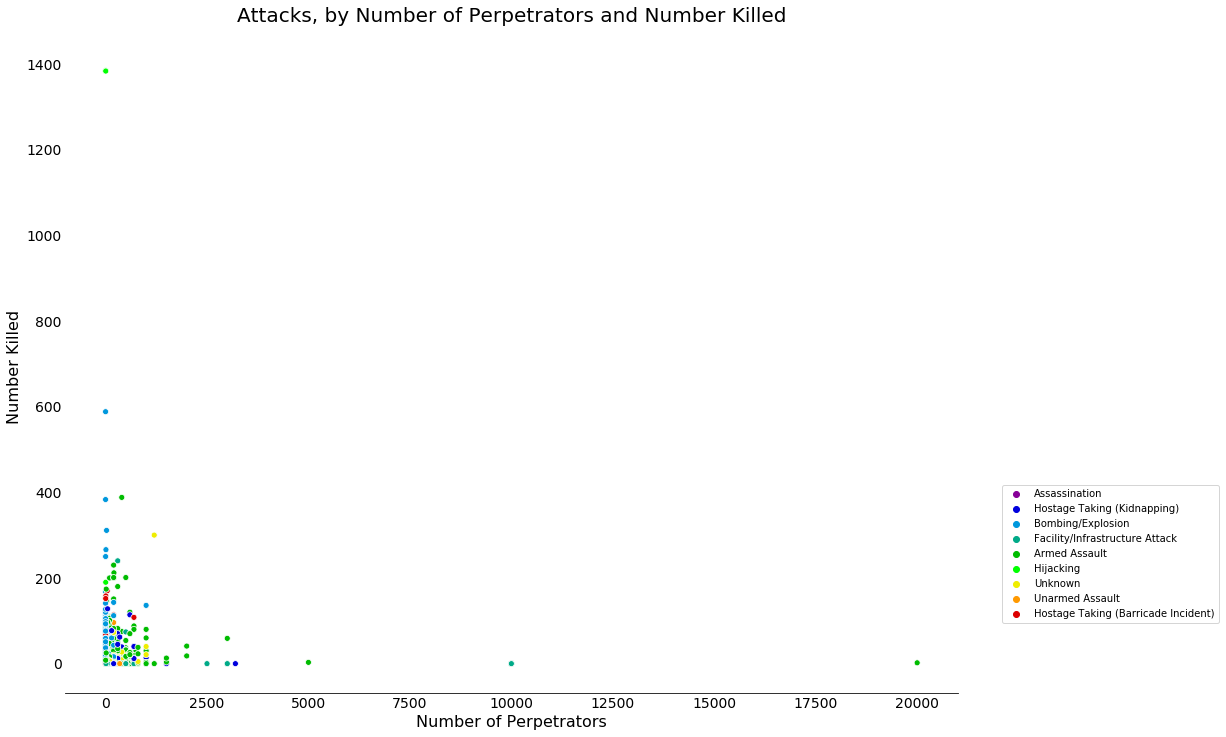

In [3]:
fig, ax = plt.subplots(figsize = (16, 12))
sns.scatterplot(x = 'nperps', y = 'nkill', data = df, hue = 'attacktype1_txt', palette = 'nipy_spectral')
plt.title('Attacks, by Number of Perpetrators and Number Killed', fontsize = 20, y = 1.02)
plt.ylabel('Number Killed', fontsize = 16)
plt.xlabel('Number of Perpetrators', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
handles, labels = ax.get_legend_handles_labels()
plt.legend(bbox_to_anchor=(1.05, 0.32), loc=2, borderaxespad=0., handles=handles[1:], labels=labels[1:])
sns.despine(left = True);

In [10]:
perps_kill = df[['nperps', 'nkill']]
correlation = perps_kill.corr()['nkill']['nperps']
print('Correlation between number of perpetrators and number killed: {:,.3f}'.format(correlation))

Correlation between number of perpetrators and number killed: 0.014


The correlation between number of perpetrators and number killed is modest but positive. One consideration is that it is powerfully affected by extreme outliers. If two or three of the incidents with extremely high perpetrator counts are dropped, it increases to several times that size, suggesting that the large average difference in perpetrator numbers between bombing and the other attack types may well be a significant contributor to the difference in average numbers killed. It's not totally obvious to me that removing extreme outliers here is a good idea, but it may give a clearer picture of what trends are like in the bulk of the data.

Let's look at which types of attack are most likely to cause no deaths.

In [ ]:
none_killed = pd.DataFrame(columns = ['method', 'percent none killed'])

for method in df['attacktype1_txt'].unique():
    method_data = df[df['attacktype1_txt'] == method]
    percent_none_killed = ((method_data['nkill'] == 0).sum() / len(method_data)) * 100
    
    none_killed = none_killed.append(pd.DataFrame({'method': method, 'percent none killed': percent_none_killed}, index = [0]))
    
none_killed = none_killed.sort_values(by = 'percent none killed', ascending = False)

fig, ax = plt.subplots(figsize = (16, 8))
sns.barplot(none_killed['method'], none_killed['percent none killed'], palette = 'viridis')
plt.title('Probability of No Fatalities by Attack Type', fontsize = 22, y = 1.02)
plt.ylabel('Percent of Attacks in Which No One Died', fontsize = 14)
plt.xlabel('')
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
sns.despine(left = True)
plt.xticks(rotation = 70);

In [ ]:
assassination = df[df['attacktype1_txt'] == 'Assassination']
percent_one_killed = ((assassination['nkill'] == 1).sum() / len(assassination)) * 100

print('Percent of assassinations in which exactly one person was killed: {:,.2f}'.format(percent_one_killed))

In [ ]:
data = []
method_name_list = []
fig, ax = plt.subplots(figsize = (16, 10))
for method in df['attacktype1_txt'].unique():
    method_data = df[df['attacktype1_txt'] == method]['nkill'].dropna().clip(0, 100)
    data.append(method_data)
    method_name_list.append(method)

plt.boxplot(data)
ax.set_xticklabels(method_name_list, rotation = 70)
plt.title('Boxplot of Numbers Killed by Attack Type (for < 100 killed)', fontsize = 22, y = 1.02)
plt.ylabel('Number Killed')
sns.despine(left = True);

This is a pretty strange boxplot, since the values are so concentrated.

Facility/Infrastracture Attack, Hijacking, and Unarmed Assault each have all quartiles at zero (because more than 75% of cases had 0 killed), so the boxplot is just a line at 0 for them. Similarly, the boxplot for Assassinations is just a line at 1, because 57% of assassinations resulted in 1 person being killed. That 57% straddles the interquartile range, so all of the quartiles are 1.

The medians for Armed Assault, Assassination, and Unknown are each 1 killed per attack. The medians of everything other category are 0 killed per attack.

The upper quartiles of Bombing/Explosion and both types of kidnapping are 1. The upper quartile of Armed Assault is 3, and the upper quartile of Unknown is 5.

On the graph above I cut the values at 100 killed, so the boxplots would actually be visible. But the plot of "outliers" which results from making a boxplot of the full data is actually interesting as well, so it's plotted below.

In [ ]:
data = []
method_name_list = []
fig, ax = plt.subplots(figsize = (16, 10))
for method in df['attacktype1_txt'].unique():
    method_data = df[df['attacktype1_txt'] == method]['nkill'].dropna()
    data.append(method_data)
    method_name_list.append(method)

plt.boxplot(data)
ax.set_xticklabels(method_name_list, rotation = 70)
plt.title('Boxplot of Numbers Killed by Attack Type', fontsize = 22, y = 1.02)
plt.ylabel('Number Killed')
sns.despine(left = True);

In [ ]:
weapon = df.groupby('weaptype1_txt').count()['eventid'].sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (16, 10))
plt.bar(weapon.index, weapon.values, color = 'yellow', alpha = 0.96)
ax.set_facecolor('black')
plt.xticks(rotation = 84)
plt.title('Number of Attacks by Weapon Used', fontsize = 22, y = 1.03);

Unsurprisingly, given the prevalence of bombings which we have already observed, explosives are the most common weapon used.

Presumably the weapons generally used vary with the target of attack. Let's look at the weapons used in assassinations.

In [ ]:
assassination = df[df['attacktype1_txt'] == 'Assassination']

as_weapons = assassination.groupby('weaptype1_txt').count()['eventid'].sort_values(ascending = False)

print('Number of assassinations by weapon type:')
for index, row in as_weapons.iteritems():
    print(index, row)

In [ ]:
weapon_kills = df.groupby('weaptype1_txt').mean()['nkill'].sort_values(ascending = False)
weapon_kills.index.name = ''
print('Average number killed per attack by weapon type:')
weapon_kills

Yet again one of our averages is hugely influenced by the World Trade Center attacks. The averages with those attacks removed are displayed below.

In [ ]:
wtc_removed = df.drop([73126, 73127])
weapon_kills = wtc_removed.groupby('weaptype1_txt').mean()['nkill'].sort_values(ascending = False)
weapon_kills.index.name = ''
print('Average number killed per attack by weapon type, with WTC attack removed:')
weapon_kills

Another particularly interesting sort of attack is the suicide attack. How common are suicide attacks? Are they worse than regular attacks?

In [ ]:
suicide = df.groupby('suicide')['eventid'].count()

fig, ax = plt.subplots(figsize = (6, 6))
plt.bar(suicide.index, suicide.values, color = 'darkred', alpha = 0.9)
plt.xticks([0, 1])
ax.set_xticklabels(['Non-Suicide', 'Suicide'], fontsize = 16, y = - 0.02)
#ax.tick_params(size = 0)
plt.title('Number of Incidents by Whether They Were Suicide Attacks', fontsize = 16, y = 1.04)
sns.despine(left = True)
plt.show()

suicide_percentage = (suicide[1] / (suicide[0] + suicide[1])) * 100
print('Percentage of incidents which were suicide attacks: {:,.1f}%\n'.format(suicide_percentage))


suicide_average_killed = df.groupby('suicide').sum()['nkill'] / suicide

print('The average number killed per suicide attack was {:,.2f}'.format(suicide_average_killed[1]))
print('In comparison, the average number killed per non-suicide attack was {:,.2f}'.format(suicide_average_killed[0]))
print('So suicide attacks are rare in history, but tend to be extremely deadly')
print('This effect is not contingent on the inclusion of the World Trade Center Attacks')

In [ ]:
suicide_over_time = df.groupby('iyear').mean()['suicide'] * 100

fig, ax = plt.subplots(figsize = (16, 7))
plt.plot(suicide_over_time.index, suicide_over_time.values, color = 'darkred', linewidth = 5)
plt.title('Suicide Attacks over Time', fontsize = 22, y = 1.05)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('% of Attacks Which Were Suicidal', fontsize = 16)
sns.despine(left = True);

It looks like the trend of attacking suicidally began in the '90s. Now suicide attacks makes up a substantial minority of all attacks, with ~7.7% of attacks in 2017 involving suicide.

# Targets of Attack 

In [ ]:
target = df.groupby('targtype1_txt')['eventid'].count().sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (20, 10))
sns.barplot(target.index, target.values, palette = 'plasma')
plt.title('Number of Attacks by Target Type', fontsize = 26, y = 1.02)
plt.xticks(rotation = 80)
plt.xlabel('')
plt.setp(ax.get_xticklabels(), fontsize = 16)
sns.despine(left = True)
plt.show()

Let's make separate plots for each region, and see what kind of variation there is.

In [ ]:
def plot_bar(region, axis):
    region_data = df[df['region_txt'] == region]
    
    target = region_data.groupby('targtype1_txt')['eventid'].count().sort_values(ascending = False)

    axis.bar(target.index, target.values, color = 'black')
    axis.set_title(region, fontsize = 22, y = 1.02)
    for tick in axis.get_xticklabels():
        tick.set_rotation(90)
    plt.setp(axis.get_xticklabels(), fontsize = 16)
    sns.despine(left = True)
    
fig, axes = plt.subplots(6, 2, figsize = (20, 60))
plt.suptitle('Number of Attacks by Target Type in Each Region', fontsize = 26, y = 0.905)
plt.subplots_adjust(hspace = 1.2)

count = 0
for country in df['region_txt'].unique()[:6]:
    plot_bar(country, axes[count, 0])
    count += 1

count = 0
for country in df['region_txt'].unique()[6:]:
    plot_bar(country, axes[count, 1])
    count += 1

In [ ]:
abortion = df[df['targtype1_txt'] == 'Abortion Related']
print('Number of abortion related terror attacks which have taken place in North America since 1970:', len(abortion))
print('Number of those attacks which took place in the United States:', len(abortion['country_txt'] == 'United States'))

It's interesting that essentially all of the abortion related terrorism has taken place in North America. Elsewhere it's either vanishingly small or not present at all, but in North America it makes up a substantial portion of the terrorist activity. Unsurprisingly, all of those attacks took place in America, rather than Mexico or Canada (see the hidden code cell above).

Now let's look at how deadly attacks on each target type tend to be.

In [ ]:
target = df.groupby('targtype1_txt')['eventid'].count().sort_values(ascending = False)
average_target_killed = (df.groupby('targtype1_txt').sum()['nkill'] / target).sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (20, 10))
plt.bar(average_target_killed.index, average_target_killed.values, color = 'black')
plt.title('Average Number Killed by Target Type', fontsize = 22, y = 1.02)
plt.xticks(rotation = 80, fontsize = 14)
sns.despine(left = True);

I'll also plot this graph with error bars of one standard deviation, to give some sense of the variance in the data. The error bars are of course huge relative to the mean values plotted, since most attacks kill no one or very few people, while some attacks kill very many.

In [ ]:
average_target_killed = (df.groupby('targtype1_txt').sum()['nkill'] / target)
std_target_killed = (df.groupby('targtype1_txt').std()['nkill'])
#average_target_killed.sort_values(ascending = False)
std_target_killed

target_killed = pd.DataFrame({'average': average_target_killed.values, 'standard deviation': std_target_killed.values}, 
                             index = average_target_killed.index).sort_values(by = 'average', ascending = False)

fig, ax = plt.subplots(figsize = (16, 10))
plt.bar(target_killed.index, target_killed['average'], yerr = target_killed['standard deviation'], color = 'grey', alpha = 0.6)
plt.title('Average Number Killed by Target Type, with error bars', fontsize = 20, y = 1.02)
plt.xticks(rotation = 90, fontsize = 14)
plt.ylim(0, 25)
sns.despine(left = True);

And let's get a full boxplot as well, so we can see the extreme outliers.

In [ ]:
data = []
method_name_list = []
fig, ax = plt.subplots(figsize = (16, 10))
for method in target_killed.index:
    method_data = df[df['targtype1_txt'] == method]['nkill'].dropna()
    data.append(method_data)
    method_name_list.append(method)

plt.boxplot(data)
ax.set_xticklabels(method_name_list, rotation = 90, fontsize = 14)
plt.title('Boxplot of Numbers Killed by Target Type', fontsize = 22, y = 1.02)
plt.ylabel('Number Killed')
sns.despine(left = True);

# Perpetrators

In [ ]:
group = df.groupby('gname').count()['eventid'].sort_values(ascending = False)

worst_groups = group[1:31]

plt.subplots(figsize = (10, 12))
plt.barh(worst_groups.index, worst_groups.values, color = 'black')
plt.title('Groups Which Have Made the Most Attacks', fontsize = 20, y = 1.02)
plt.xlabel('Number of Attacks', fontsize = 14)
plt.show()

print('Together, these 30 groups have made {} attacks'.format(worst_groups.sum()))
print('That is {:,.1f}% of the attacks in the dataset\n'.format((worst_groups.sum() / len(df) * 100)))


print('Number of incidents for which the group responsible was unknown:', group['Unknown'])
print('Percent of total incidents: {:,.1f}%\n'.format((group['Unknown'] / len(df)) * 100))

groups_10 = group[group >= 10]
print('Number of groups which perpetrated 10 or more attacks:', len(groups_10))
print('There are {} groups listed in total, so {:,.1f}% of the groups perpetrated 10 or more attacks\n'.format(
    len(group), len(groups_10) / len(group) * 100))

print('Collectively, these groups which have done 10 or more attacks commited {} attacks'.format(groups_10.drop('Unknown').sum()))
print('That is {:,.1f}% of all attacks'.format((groups_10.drop('Unknown').sum() / len(df)) * 100))
print('That, together with the attacks for which there is no information, accounts for {:,.1f}% of attacks\n'.format((groups_10.sum() / len(df)) * 100))


individual = df[df['individual'] == 1]

percent_individual = (len(individual) / len(df)) * 100
print('Percentage of attacks which were perpetrated by an independent actor: {:,.2}%'.format(percent_individual))

It's a little surprising to me how few attacks were committed by independent actors (i.e. 0.3%), given the prevalence in media of the idea of "lone wolves". This may be bias from my North American perspective, as this sort of attack is much more prevalent in North America and Western Europe.

In [ ]:
independent = df[df['individual'] == 1].groupby('region_txt').count()['eventid'].sort_values(ascending = False)
independent.index.name = ''

fig, ax = plt.subplots(figsize = (16, 8))
plt.bar(independent.index, independent.values, color = 'black')
plt.xticks(rotation = 80)
sns.despine(left = True)
plt.title('Number of Lone Wolf Attacks by Region', fontsize = 18, y = 1.02);

They may also be in the media more because their frequency is increasing.

In [ ]:
independent = df[df['individual'] == 1].groupby('iyear').count()['eventid']

fig, ax = plt.subplots(figsize = (14, 8))
plt.plot(independent.index, independent.values, color = 'red', linewidth = 3)
ax.set_facecolor('grey')
fig.set_facecolor('lightgrey')
plt.setp(ax.get_xticklabels(), fontsize = 14)
plt.setp(ax.get_yticklabels(), fontsize = 14)
plt.title('Number of Lone Wolf Attacks by Year', fontsize = 20, y = 1.03)
plt.show()


year2017 = df[df['iyear'] == 2017]
na = year2017[year2017['region_txt'] == 'North America']
na_independent = na[na['individual'] == 1]
eu = year2017[year2017['region_txt'] == 'Western Europe']
eu_independent = eu[eu['individual'] == 1]
print('Percent of North American attacks which were independent in 2017: {:,.1f}%'.format((len(na_independent) / len(na)) * 100))
print('Percent of Western European attacks which were independent in 2017: {:,.1f}%'.format((len(eu_independent) / len(eu)) * 100))

So it looks like this is actually a significant phenomenon in North America and -- to a lesser extent -- in Western Europe.

In [ ]:
individual_killed = df.groupby('individual').sum()['nkill'] / df.groupby('individual').count()['eventid']

print('Average number killed in non-independent attacks: {:,.1f}'.format(individual_killed[0]))
print('Average number killed in independent attacks: {:,.1f}'.format(individual_killed[1]))

Independent attacks don't tend to be any deadlier than group-based attacks, unsurprisingly.

Let's see if some of the top groups we identified above tend to kill more than others with their attacks.

In [ ]:
group = df.groupby('gname').count()['eventid'].sort_values(ascending = False)
worst_groups = group[1:31]

average_kills_dict = {}
for group in worst_groups.index:
    group_data = df[df['gname'] == group]['nkill']
    
    average_kills_dict[group] = group_data.mean()
    
average_kills = pd.Series(average_kills_dict).sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (20, 10))
plt.bar(average_kills.index, average_kills.values, color = 'r')
plt.xticks(rotation = 90)
plt.title('Average Number Killed Per Attack, for groups with most attacks', fontsize = 24, y = 1.04)
sns.despine(left = 'True')
ax.set_facecolor('black')
plt.setp(ax.get_yticklabels(), fontsize = 16)
plt.setp(ax.get_xticklabels(), fontsize = 14);

In [ ]:
print('Number of FLNC attacks:', len(df[df['gname'] == 'Corsican National Liberation Front (FLNC)']['nkill']))
print('Number of people FLNC has killed:', int(df[df['gname'] == 'Corsican National Liberation Front (FLNC)']['nkill'].sum()))

print()
print('Number of FDN attacks:', len(df[df['gname'] == 'Nicaraguan Democratic Force (FDN)']))
print('Number of people the FDN has killed:', int(df[df['gname'] == 'Nicaraguan Democratic Force (FDN)']['nkill'].sum()))

What a contrast. The Corsican National Liberation Front has killed people, but only 13 people, despite launching 639 terror attacks (see the hidden cell above). Whereas the Nicaraguan Democratic Force has killed 6662 people in 895 attacks.

# "Success" of Attacks

In [ ]:
success = df.groupby('success')['eventid'].count()

fig, ax = plt.subplots(figsize = (8, 8))
plt.bar(success.index, success.values, color = 'black')
plt.xticks([0, 1])
plt.title('Number of Attacks by Successfulness', fontsize = 18, y = 1.04)
ax.set_xticklabels(['Failure', 'Success'], fontsize = 16, y = - 0.02)
sns.despine(left = True)
plt.show()

percent_successful = (success[1] / (success[0] + success[1])) * 100
print('Percentage of attacks which were successful: {:,.2f}'.format(percent_successful))

It looks like terrorists generally manage to achieve the direct objectives of their strikes. Of course, that doesn't necessarily translate into furthering the broader goals which motivate those strikes. This dataset has understandably poor information on the motives behind attacks (almost all of the entries are empty or 'Unknown'), and no information on the wider effects of the attacks. Nonetheless, whether or not attacks were successful in their direct goals is certainly significant. Let's see how other factors in the data relate to success rates.

First, we'll look at how success rate varies by country.

In [ ]:
country_success_rate = df.groupby('country_txt').mean()['success']

data = dict(type = 'choropleth', 
            locations = country_success_rate.index,
            locationmode = 'country names',
            z = country_success_rate.values, 
            text = country_success_rate.index)
layout = dict(title = 'Percentage of Attacks Which Were Successful', 
              height = 1200,
              geo = dict(showframe = False, 
                         projection = {'type': 'mercator'}))

fig = go.Figure(data = [data], layout=layout)
iplot(fig)

Evidently the rate is high almost everywhere, although there is certainly variation between countries.

In [ ]:
country_success_rate = df.groupby('country_txt').mean()['success']

print('Countries with the lowest success rate:')
for index, row in country_success_rate.sort_values().head(20).iteritems():
    print(index, '{:,.1f}'.format(row))

In [ ]:
grouped = df.groupby('country_txt')
killed = grouped.count()['nkill']
success_rate = grouped.mean()['success'] * 100
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(killed, success_rate, color = 'black')
plt.title('Scatterplot of Countries by Success Rate and Number Killed', fontsize = 20, y = 1.02)
plt.ylabel('% Attacks Successful in Country', fontsize = 16)
plt.xlabel('Number Killed in Country', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
sns.despine(left = True);

The countries with the greatest number killed don't have the highest success rates, although they certainly don't have exceptionally low rates of success either.

Now let's look at how the rate has changed over time.

In [ ]:
year_success = df.groupby('iyear').mean()['success'] * 100

fig, ax = plt.subplots(figsize = (18, 8))
plt.plot(year_success.index, year_success.values, color = 'black', linewidth = 5)
plt.title('Success Rate over Time', fontsize = 22, y = 1.03)
plt.ylabel('Percentage of Attacks which were Successful', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 16)
plt.ylim(0, 100)
sns.despine(left = True);

The success rate has declined somewhat recently, and is at its lowest point since the '70s. 

In [ ]:
n = len(df['region_txt'].unique())
color = plt.cm.rainbow(np.linspace(0,1,n))
c = zip(range(n), color)
colors = [color for color in c]
count = 0

fig, ax = plt.subplots(figsize = (16, 10))
for region in df['region_txt'].unique():
    region_data = df[df['region_txt'] == region]
    year_success = region_data.groupby('iyear').mean()['success'] * 100

    plt.plot(year_success, label = region, color = colors[count][1])
    count += 1
    
plt.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0.)
plt.title('Success Rate Over Time by Region', fontsize = 22, y = 1.02)
sns.despine(left = True);

It's interesting that several regions had a sucess rate of 100% for long stretches.

This graph is kind of a mess though, so let's plot success rates in the most attacked regions alone.

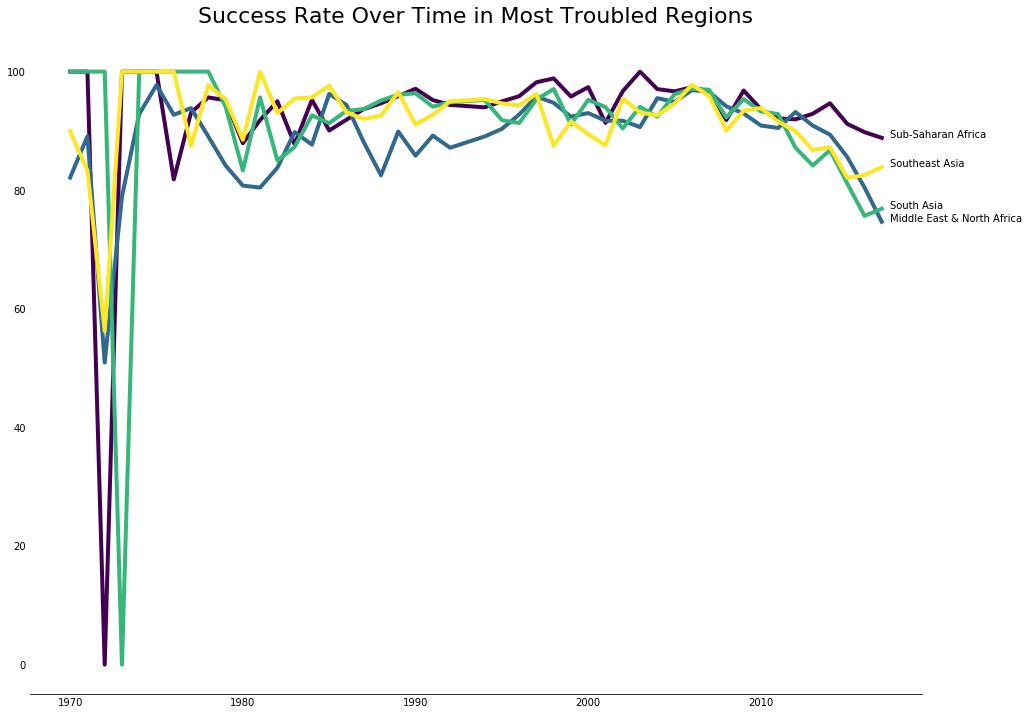

In [15]:
n = 4
color = plt.cm.viridis(np.linspace(0,1,n))
c = zip(range(n), color)
colors = [color for color in c]
count = 0

fig, ax = plt.subplots(figsize = (16, 12))
for region in ['Sub-Saharan Africa', 'Middle East & North Africa', 'South Asia', 'Southeast Asia']:
    region_data = df[df['region_txt'] == region]
    year_success = region_data.groupby('iyear').mean()['success'] * 100
    
    plt.plot(year_success, linewidth = 4, color = colors[count][1])
    plt.text(year_success.index[-1] + 0.5, year_success.values[-1], region)
    count += 1
    
sns.despine(left = True)
plt.title('Success Rate Over Time in Most Troubled Regions', fontsize = 22, y = 1.02);

It looks like a lot of the recent reduction in success rate stems from falling success rates in these key regions. The success rate in Sub-Sahran Africa remains high, and the rate in Southeast Asia has also stayed quite high, but the rate in South Asia, and the Middle East & North Africa has fallen substantially.

Let's see the total success rate by region, not taking time into account.

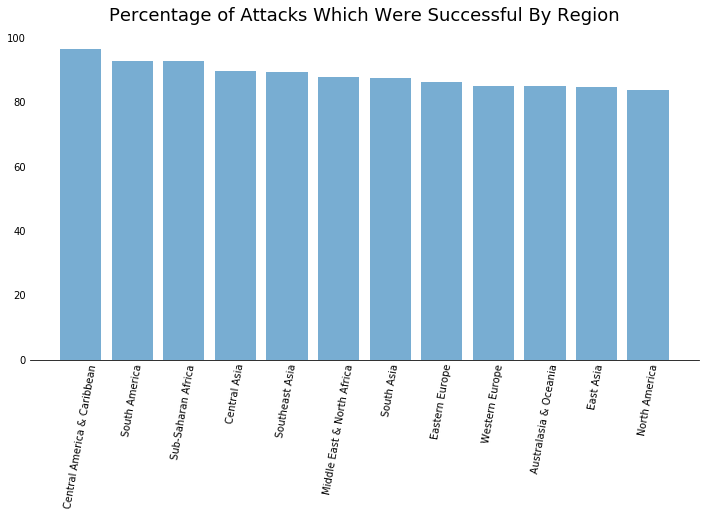

In [14]:
region_success = df.groupby(['region_txt', 'success'])['eventid'].count()

fraction_dict = {}
for region in df['region_txt'].unique():
    success = region_success[region][1]
    failure = region_success[region][0]
    fraction_successful = (success / (success + failure)) * 100
    fraction_dict[region] = fraction_successful

fraction_series = pd.Series(fraction_dict).sort_values(ascending = False)

plt.subplots(figsize = (12, 6))
plt.bar(fraction_series.index, fraction_series.values, alpha = 0.6)
plt.xticks(rotation = 80)
plt.title('Percentage of Attacks Which Were Successful By Region', fontsize = 18, y = 1.02)
sns.despine(left = True)
plt.show()

Now let's check out variation by attack type and target type.

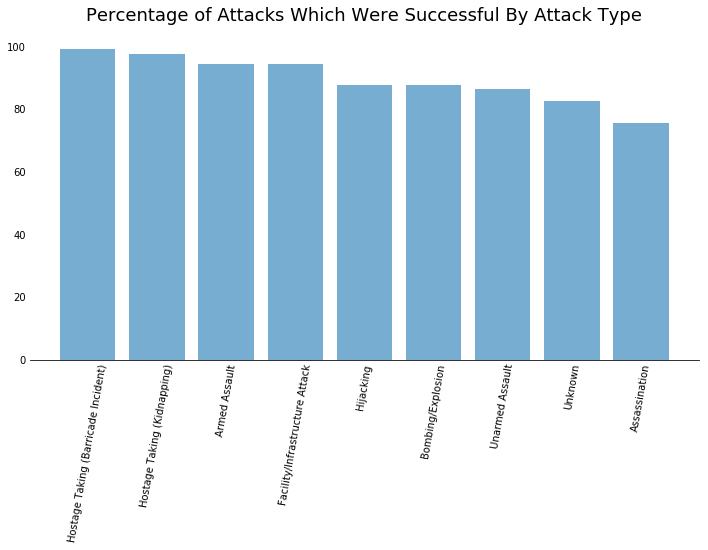

In [13]:
method_success = df.groupby(['attacktype1_txt', 'success'])['eventid'].count()

fraction_dict = {}
for method in df['attacktype1_txt'].unique():
    success = method_success[method][1]
    failure = method_success[method][0]
    fraction_successful = (success / (success + failure)) * 100
    fraction_dict[method] = fraction_successful

fraction_series = pd.Series(fraction_dict).sort_values(ascending = False)

plt.subplots(figsize = (12, 6))
plt.bar(fraction_series.index, fraction_series.values, alpha = 0.6)
plt.xticks(rotation = 80)
plt.title('Percentage of Attacks Which Were Successful By Attack Type', fontsize = 18, y = 1.02)
sns.despine(left = True)
plt.show()

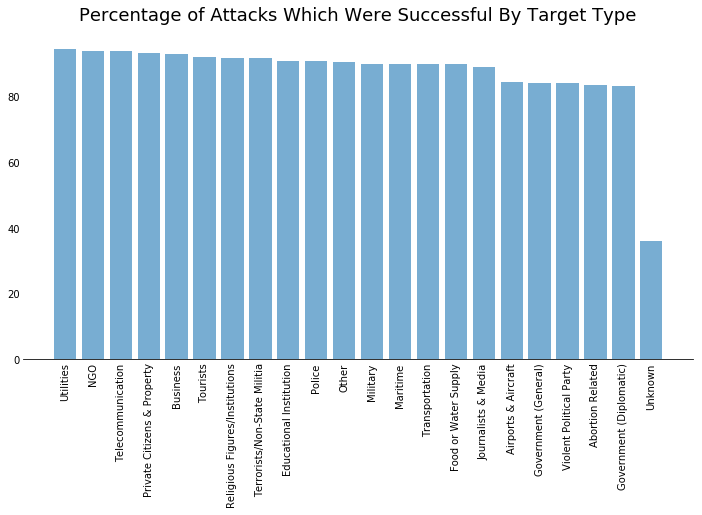

In [12]:
target_success = df.groupby(['targtype1_txt', 'success'])['eventid'].count()

fraction_dict = {}
for target in df['targtype1_txt'].unique():
    success = target_success[target][1]
    failure = target_success[target][0]
    fraction_successful = (success / (success + failure)) * 100
    fraction_dict[target] = fraction_successful

fraction_series = pd.Series(fraction_dict).sort_values(ascending = False)

plt.subplots(figsize = (12, 6))
plt.bar(fraction_series.index, fraction_series.values, alpha = 0.6)
plt.xticks(rotation = 90)
plt.title('Percentage of Attacks Which Were Successful By Target Type', fontsize = 18, y = 1.02)
sns.despine(left = True)
plt.show()

What about attacks by people acting alone?

In [ ]:
individual = df[df['individual'] == 1]
independent_success = individual.groupby('success')['eventid'].count()

print('Percentage of attacks by independent actors which were successful: {:,.1f}%'.format(
        (independent_success[1] / (independent_success[1] + independent_success[0])) * 100))

The general success rate is ~89%, so independent actors are substantially less likely to succeed, although they mostly still do.

# Conclusion

A few take-aways:

- The rate at which attacks were committed substantially spiked in the last decade, and then declined constantly since 2014, though it remains high relative to historical levels.
- Recently, the vast majority of attacks have taken place in the Middle East & North Africa, South Asia, Sub-Saharan Africa, and Southeast Asia.
- In particular, ~35% of all attacks in the dataset took place in Iraq, Pakistan, Afghanistan, or India.
- In total, the dataset records about 412,000 deaths of terrorist victims.
- Approximately half of the attacks killed no one.
- Of those attacks which killed someone, ~40% killed exactly one person.
- Bombing has been the most common type of attack for the entire time span covered by the dataset.
- In most of the dataset, lone wolf attacks are extremely uncommon. However, in recent years they have made up a fairly substantial portion of the attacks in North America (reaching a high of ~50% in 2017).
- A large majority of terrorist attacks succeed in their direct goals, although their success in furthering broader motivating goals is less clear.

<br/>
Thank you for reading my exploration of the START UMD terrorism dataset. I hope it was helpful or interesting for you. If you have any questions or suggestions, please leave a comment below.